<h1><center> PPOL564 | DS1: Foundations </center><h1>
<h3><center> Lecture 23 <br><br><font color='grey'> 
Probability </font></center></h3>

### Today's Topics

- Probability Basics 
- PMF/PDFs, CDFs, Expectation, and Variance
- Survey of some Discrete and Continuous Distributions
- Proving the Central Limit Theorem with simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Probability Basics

### Probability Space

All probabilities lie between zero and one. 

<br>
<br>

$$Pr(A) \in [0,1]$$

<br>
<br>

If $Pr(A) = 0$, then $A$ _cannot happen_. If $Pr(A) = 1$, then $A$ is certain.

### Sample Space
> The set of all possible outcomes. That is, each possible event we _might_ observe. 

<br>
<br>

$$Pr(A) = \frac{\text{No. of outcomes in event A}}{\text{No. of outcomes in the sample space}}$$

<br>
<br>

- **simple event**  = a single outcome (cannot be broken down further into another constituent part, i.e. multiple outcomes)
- **compound event**  = two or more simple events

If $S$ is the sample space containing all events that might happen, then

<br>
<br>

$$Pr(S) = 1$$

### Independence

> Two events are considered independent if the probability that one event occurs does not change the probability that the other event occurs.

<br>
<br>
$$Pr(A | B) = Pr(A)$$

<br>
<br>

$$Pr(B | A) = Pr(B)$$

<br>
<br>

### Joint Probability

> The probability of two or more independent events occurring.

The probability that $A$ _and_ $B$ happen.

For example, say the probability that you'll check Facebook 5 times today is .33 _and_ the probability that I'll say "right" more than 4 times in this lecture is .56. Then the joint probability of these two independent events is .33*.56 is .185.

<br>
<br>

$$Pr(A \cap B) = Pr(A)Pr(B)$$

<br>
<br>

### Mutually exclusive

> Two events are considered mutually exclusive when one event _cannot_ occur if the other event has occurred.

For example, consider the education levels for respondents in a survey: (1) some high school, (2) high school graduate, (3) some college, (4) college graduate, (5) some graduate training, (6) graduated from graduate school. Respondents can only be located in one of these categories. 

<br>
<br>

$$Pr(A \cap B) = 0$$

### Conditional Probability 

> The probability that one event occurring is affected by whether another event occurs.

<br>
<br>

The probability of $A$ _given_ $B$.

$$Pr(A | B) = \frac{Pr(A \cap B)}{Pr(B)}$$

<br>
<br>



### Intersection: $\cap$ 

> Events that are common to both $A$ _and_ $B$. 

<span><img src="http://ericdunford.com/ppol670/Lectures/week_04/Figures/inner_join.png" width =20%></span>



<br>
<br>
When $A$ and $B$ are independent

<br>
<br>

$$Pr(A \cap B) = Pr(A)Pr(B)$$

<br>
<br>

When $A$ and $B$ are dependent

<br>
<br>

$$Pr(A \cap B) = Pr(B | A)Pr(A) = Pr(A|B)Pr(B)$$

In [2]:
A = set([1,2,5,8])
B = set([2,3,8,9])
A.intersection(B)

{2, 8}

### Union: $\cup$

> Compound event where either $A$ _or_ $B$ happens, or both.




<span><img src="http://ericdunford.com/ppol670/Lectures/week_04/Figures/left_join.png" width =20%></span>
<span><img src="http://ericdunford.com/ppol670/Lectures/week_04/Figures/right_join.png" width =20%></span>
<span><img src="http://ericdunford.com/ppol670/Lectures/week_04/Figures/full_join.png" width =20%></span>

<br>
<br>

$$Pr(A \cup B) = Pr(A) + Pr(B) - Pr(A \cap B)$$

<br>
<br>

In [3]:
A = set([1,2,5,8])
B = set([2,3,8,9])
A.union(B)

{1, 2, 3, 5, 8, 9}

### Combinations

> A combination is a way of choosing $k$ objects from $n$ objects when the order in which one chooses those objects is irrelevant.

$$\begin{pmatrix}  n  \\ k  \end{pmatrix} = \frac{n!}{k!(n-k)!}$$

In [4]:
# How many combinations of 2 pairs can we draw?
options = "abcd"
n = len(options)
k = 2

# Possible combinations
math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

6.0

In [5]:
[i for i in itertools.combinations(options,2)]

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

### Permutations

> A permutation is a way of choosing $k$ objects from $n$ objects in which the order one chooses those objects matters.

$$\frac{n!}{(n-k)!}$$

In [6]:
math.factorial(n)/math.factorial(n-k)

12.0

In [7]:
[i for i in itertools.permutations(options,2)]

[('a', 'b'),
 ('a', 'c'),
 ('a', 'd'),
 ('b', 'a'),
 ('b', 'c'),
 ('b', 'd'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'd'),
 ('d', 'a'),
 ('d', 'b'),
 ('d', 'c')]

### Random Variable

> A random variable is a variable that can take some array of values, with the probability that it takes any particular value defined according to some random process. 

Up to this point, we've talked about variables deterministically. That is, $x$ or $y$ are values that we can solve for given some equation.

<br>
<br>

$$ x + 4 = 6 $$
$$ x = 2 $$

<br>
<br>

A random variable, on the other hand, is a mapping some random process (like a coin flip) to a numerical value.

<br>
<br>

$$Pr(X) = \begin{cases} 1 \;\; Heads\\ 0 \;\; Tails\end{cases}$$

<br>
<br>

A random variable can potentially take on many values; thus, it no longer makes sense to specify a specific value, rather the _probability_ that $X$ will take on a specific value. 

<br>
<br>

$$Pr(X=1) = .5$$

<br>
<br>

A **discrete random variable** is a variable whose range is countable. 

- $X$ is a finite set (e.g. a set of integers {1,2,3,4,...})
- $X$ maps to the natural numbers ("infinitely countable")


$$ A = \text{the year 55th student accepted into DSPP was born}$$


A **continuous random variable** is a variable whose range is uncountable, or put differently, whose range can take on any value in an interval.


$$ B = \text{the height of the 55th student accepted into DSPP}$$


### Probability Distribution

> The set of values a random variable might take. The function that defines the probability that each value occurs is known as a probability mass function (PMF) (discrete variables) or a probability distribution function (PDF) (continuous variables). (More on this below).

### Sample Distribution
Probability distributions are theoretical constructs. When dealing with actual data, we encountered a "**sample distribution**", which are of the number of cases that take each of the values in a sample space for a given portion of the population of cases. We already encountered this when calculating "frequencies" (or counts) when summarizing empirical data. 

In [8]:
# Discrete Distribution
D = pd.DataFrame(dict(x=np.array([1,1,3,2,1,2,2,3,2,1,1,2,1,2,3,2])))
D.groupby("x").size()

x
1    6
2    7
3    3
dtype: int64

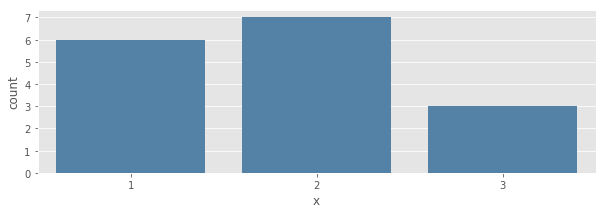

In [9]:
plt.figure(figsize=(10,3))
sns.countplot(D.x,color="steelblue")
plt.show()

### Contingency Tables

We can display the joint frequency distributions for two discrete random variables as a matrix. Representing discrete variables as a table can offer an straightforward way for calculating probabilities given observed data. These are also known as cross-tabs (or "cross-tabulation tables")

We can calculate the "**marginal probabilities**" by summing across the rows and columns (and reporting those sums in the margins of the table (i.e. thus why we say "marginal")).

<br>
<br>

|      _       | Previous Drug Use | No Previous Drug Use | Total |
|---------------|:-------------------:|:----------------------:|:-------:|
| **Voted (2016)**  |       344         |     456              | 800
| **Did Not Vote (2016)**|       566    |      132             | 698
| **Total** |       910    |      588           | 1498

<br>
<br>

_Questions_:

1. What is the probability of someone voted in 2016?

<br>
<br>

$$ Pr(\text{Voted}) = \frac{800}{1498} \approx .53$$

<br>
<br>

2. What is the probability that someone voted _and_ reported previous drug use?

<br>
<br>

$$ Pr(\text{Voted} \cap \text{Drug Use}) = \frac{344}{1498} \approx .23 $$

<br>
<br>

3. What is the probability someone voted _or_ reported no previous drug use?

<br>
<br>

$$ Pr(\text{Voted} \cup \text{No Drug Use}) = \frac{800}{1498} + \frac{588}{1498} - \frac{456}{1498} \approx .62 $$

<br>
<br>

4. What is the probability someone voted given reporting previous drug use?

<br>
<br>

$$ Pr(\text{Voted} | \text{Drug Use}) = \frac{344}{910} \approx .38 $$

<br>
<br>

$$ Pr(\text{Voted} | \text{Drug Use}) = \frac{Pr(\text{Voted} \cap \text{Drug Use})}{Pr(\text{Drug Use})} = \frac{\frac{344}{1498}}{\frac{910}{1498}} \approx .38 $$

<br>
<br>

# Expectations of Random Variables

### Probability Mass Function 

$X$ is a random variable is the number 4 people randomly sampled from the population who voted in the last election. What is the probability that three out of the four people voted, $Pr(X = 3)$?

To calculate this, we need need to know something about all the potential outcomes of $X$, that is, we need to understand every potential permutation that we could draw. This forms the possible sample space. 

In [10]:
voted = ["V"]*4
not_voted = ["NV"]*4
options = voted + not_voted
possible_outcomes = set(itertools.permutations(options,4))
possible_outcomes

{('NV', 'NV', 'NV', 'NV'),
 ('NV', 'NV', 'NV', 'V'),
 ('NV', 'NV', 'V', 'NV'),
 ('NV', 'NV', 'V', 'V'),
 ('NV', 'V', 'NV', 'NV'),
 ('NV', 'V', 'NV', 'V'),
 ('NV', 'V', 'V', 'NV'),
 ('NV', 'V', 'V', 'V'),
 ('V', 'NV', 'NV', 'NV'),
 ('V', 'NV', 'NV', 'V'),
 ('V', 'NV', 'V', 'NV'),
 ('V', 'NV', 'V', 'V'),
 ('V', 'V', 'NV', 'NV'),
 ('V', 'V', 'NV', 'V'),
 ('V', 'V', 'V', 'NV'),
 ('V', 'V', 'V', 'V')}

Now let's calculate the probability that 3 out of the 4 randomly selected individuals voted in the last election.

In [11]:
cnt_3_voted = sum([1 for entry in possible_outcomes if entry.count("V") == 3])
total = len(possible_outcomes)
pr_3_voted = cnt_3_voted/total
pr_3_voted

0.25

We can calculate the probability of every possible voting outcome (i.e. $Pr(X = 0)$, $Pr(X = 1)$, ...). This is known as the **probability mass function**. 

In [12]:
pmf = []
for i in range(4+1):
    pr = sum([1 for entry in possible_outcomes if entry.count("V") == i])/len(possible_outcomes)
    pmf.append([i,pr])
pmf = pd.DataFrame(pmf,columns=["X","probability"])
pmf

,X,probability
0,0,0.0625
1,1,0.2500
2,2,0.3750
3,3,0.2500
4,4,0.0625


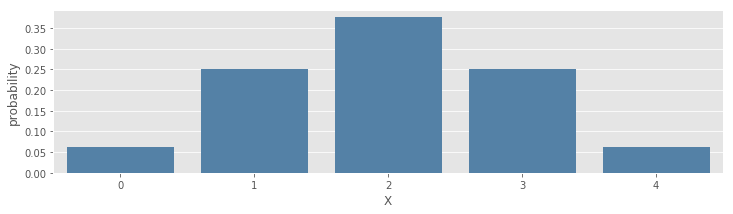

In [13]:
plt.figure(figsize=(12,3))
sns.barplot("X","probability",color="steelblue",data=pmf)
plt.show()

The PMF (or the PDF in the continuous case) is denoted by $f(x)$

### Cumulative Distribution Function 

Note that the probability for each outcome of $X$ (computed above) sums to 1.

In [14]:
pmf.probability.sum()

1.0

The cumulative distribution function (CDF) describes the function that covers a range of values below a specific value and can be defined for both discrete and continuous distributions. 

<br>
<br>

$$ Pr(X \le x) = \sum_{i\le x} p(i)$$

<br>
<br>

In [15]:
pmf.loc[:,"cdf"] = pmf.probability.cumsum()
pmf

,X,probability,cdf
0,0,0.0625,0.0625
1,1,0.2500,0.3125
2,2,0.3750,0.6875
3,3,0.2500,0.9375
4,4,0.0625,1.0000


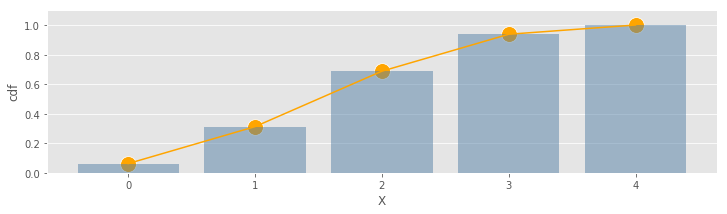

In [16]:
plt.figure(figsize=(12,3))
sns.barplot("X","cdf",color="steelblue",data=pmf,alpha=.5)
sns.lineplot("X","cdf",color="orange",data=pmf)
sns.scatterplot("X","cdf",color="orange",s=250,data=pmf)
plt.show()

We can query the CDF to find the probability that a value is less than or equal to some value.

$$ Pr(X \le 2) = Pr(X = 0) + Pr(X = 1) + Pr(X = 2)$$

In [17]:
pmf.query("X == 2").cdf

2    0.6875
Name: cdf, dtype: float64

The CDF is denoted by $F(x)$

### Expected Value
The **expectation** (or the "expected value") of a random variable $X$, denoted simply as $E[X]$, is the sum of the possible values the variable might take weighted by the probability that each value will turn up.

<br>
<br>

For discrete distributions,
<br>
<br>

$$ E[X] = \sum_{i=1}^N x_i Pr(X=x_i) = \mu_x$$

<br>
<br>

For continuous distributions,

<br>
<br>

$$ E[X] = \int_{-\infty }^\infty  x f(x) dx = \mu_x$$

<br>
<br>

where $f(x)$ denotes the probability density function.

Let's work through this definition using the example from above.

In [18]:
x = pmf.X.values; print(x)
p = pmf.probability.values; print(p)
mean_x = sum(x*p)
mean_x

[0 1 2 3 4]
[0.0625 0.25   0.375  0.25   0.0625]


2.0

### Variance

The **variance** measures the spread of observed values away from the expected ones. 

<br>
<br>

For discrete distributions,
<br>
<br>

$$Var(X) =  \sum_{i=1}^N (x_i - \mu)^2 Pr(X=x_i) = \sigma^2_x$$

<br>
<br>

For continuous distributions,

<br>
<br>

$$ E[X] = \int_{-\infty }^\infty  (x - \mu)^2 f(x) dx = \sigma^2_x$$

<br>
<br>

where $f(x)$ denotes the probability density function (PDF).

In [19]:
# Again, keeping with the working example from above...
sum(((x - mean_x)**2)*p)

1.0

To get the **standard deviation**, we just take the square root of the variance.

$$ \sigma_x = \sqrt{\sigma^2_x} $$

In [20]:
math.sqrt(sum(((x - 2)**2)*p))

1.0

# Discrete Distributions

## Bernoulli Distribution 

> The Bernoulli Distribution  describes the frequency of two outcomes over repeated observations (e.g. coin flips). The distribution is built on the assumption that the individual events are _independent_ of one another (e.g. the outcome of one coin flip doesn't effect the outcome of the subsequent flip). The Bernoulli Distribution is the building block for other discrete distributions.

<br>
<br>

The PMF for the Binomial Distribution

<br>
<br>

$$Pr(Y = y \;|\; p) = \begin{cases} 1 - p \;\;\text{ for } y= 0\\ p \;\;\;\;\;\;\;\:\text{ for } y= 1 \end{cases}$$


<br>
<br>

$$ Pr(Y = y \;|\; p) = p^y (1 - p) ^{1-y}$$ 

<br>
<br>

where $y = 0$ or $y = 1$.

<br>
<br>

We denote a variable that is distributed as a Bernoulli distribution as 

<br>
<br>

$$Y \sim Bern(p)$$

<br>
<br>

Where the parameter $p$ corresponds to the probability of "success".

### Expectation (Mean) 

Recall our equation for the mean. 

$$ E[X] = \sum_{i=1}^N x_i Pr(X=x_i)$$

<br>
<br>

$$ E[Y] = (1)p + (0)(1-p)$$

<br>
<br>

$$ E[Y] = p$$

### Variance

Recall our equation for the variance.

$$Var(X) =  \sum_{i=1}^N (x_i - \mu)^2 Pr(X=x_i) $$


<br>
<br>

$$ Var(Y) = ((1)-p)^2 p + ((0)-p)^2 (1-p) $$

<br>
<br>

$$ Var(Y) = p^3 - 2p^2 + p + p^2 - p^3 $$

<br>
<br>

$$ Var(Y) = -p^2 + p $$

<br>
<br>

$$ Var(Y) = p(1-p) $$

<br>
<br>

### Simulation

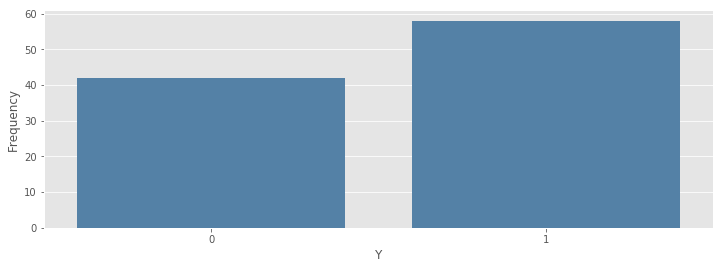

In [21]:
np.random.seed(1234)
Y = np.random.binomial(n = 1, p = .6,size = 100)

# Plot
plt.figure(figsize=(12,4))
ax = sns.countplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

## Binomial Distribution

The binomial distribution can describe any discrete distribution with three or more observations where 

- each observation is composed of a binary outcome (e.g. yes/no, war/no war, voted/didn't vote), 
- the observations are independent, and 
- we have a record of the number of times one value was obtained (e.g. the sum of positive outcomes). 

In other words, it is the discrete probability distribution of the number of successes in a sequence of $n$ independent "experiments" or "trials", where $p$ is the probability of success of each trial. Note that $p$ is assumed to be constant and $n$ finite. 

The PMF for the Binomial Distribution

<br>
<br>

$$Pr(Y = y |n,p) = \begin{pmatrix}  n  \\ y  \end{pmatrix} p^y(1-p)^{n-y}$$

<br>
<br>

where $n \ge y$, and $n$ and $y$ are positive integers and $0 \le p \le 1$.

<br>
<br>

We denote a variable that is distributed as a Binomial distribution as 

<br>
<br>

$$Y \sim Bin(n,p)$$

<br>
<br>

Where the parameters $n$ denotes the number of trials, and $p$ corresponds to the probability of "success".

### Expectation (Mean)

Recall that the expected value for any single trial is determined by the Bernoulli Distribution.

$$\mu_{bernoulli} = p $$

For the binomial distribution, we are repeating a Bernoulli trial $n$ times. Given that the outcome (0 or 1) and probability of success ($p$) is constant, we can multiple those individual probabilities of success by our $n$ trials. 

<br>
<br>

$$ E[Y] = n((1)p + (0)(1-p)) $$

$$ E[Y] = np $$ 



### Variance

Likewise, we are multiplying the variance of the Bernoulli distribution by the $n$ trials. 

$$ Var(Y) = np(1-p)$$

### Simulation

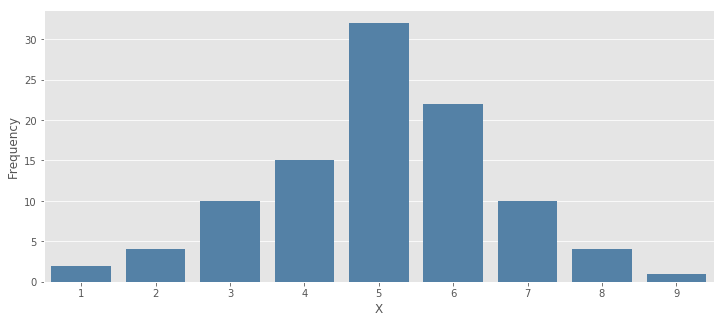

In [22]:
np.random.seed(1234)
Y = np.random.binomial(n = 10, p = .5,size = 100)

# Plot
plt.figure(figsize=(12,5))
ax = sns.countplot(Y,color="steelblue")
ax = ax.set(xlabel='X', ylabel='Frequency')

An interesting thing to note is that as $n$ is large and $p$ is close to .5, then the binomial distribution begins to approximate a _Normal Distribution_ (see below), where $Y \sim Normal(np,np(1-p))$. 

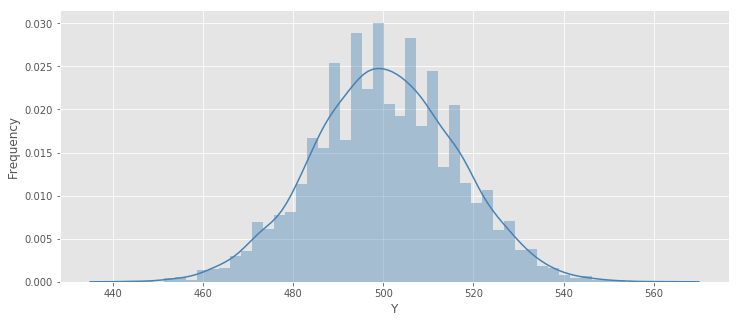

In [23]:
# Altering values of n and p
np.random.seed(1234)
Y = np.random.binomial(n = 1000, p = .5,size = 5000)

# Plot
plt.figure(figsize=(12,5))
ax = sns.distplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

## Multinomial Distribution

"The multinomial distribution is an extension of the binomial distribution to cases where more than two mutually exclusive outcomes can occur (i.e. think about an election where we have more than two candidates in a race). The multinomial distribution counts the number of times each one of $k$ different outcomes happens, where each outcome happens with probability $p_i$, $i \in \{1,\dots,k\}$. Since the outcomes are mutually exclusive and colelctively exhaustive, all these probabilities sum to one." (224) 

The PMF of the Multinomial Distribution is

<br>
<br>

$$Pr( (Y_1 = y_1) \cap (Y_2 = y_2) \cap \dots \cap (Y_k = y_k) ) = \begin{cases} \frac{n!}{y_1!\dots y_k!} \prod_{i=1}^k p_i^{y_i} \;\; when \sum_{i=1}^k y_i = n\\ 0 \;\;\; \text{otherwise} \end{cases}$$

<br>
<br>

We denote a variable that is distributed as a Multinomial distribution as 

<br>
<br>

$$Y \sim Multinomial(n,p_1,\dots,p_k)$$

<br>
<br>

Where the parameters $n$ denotes the number of trials, and $p_i$ corresponds to the probability of "success" for each outcome, where $\sum_{i=1}^k p_i  = 1$

### Expectation (Mean)

$$ E[Y_i] = np_i $$

where $i \in \{1,\dots,k\}$ and $k$ is the total number of possible outcomes.

### Variance


$$ Var[Y_i] = np_i(1-p_i) $$

where $i \in \{1,\dots,k\}$ and $k$ is the total number of possible outcomes.

### Simulation

In [24]:
np.random.seed(1234)
Y = np.random.multinomial(n= 3,pvals = [1/3]*3,size=10)
Y

array([[0, 2, 1],
       [1, 2, 0],
       [2, 0, 1],
       [0, 2, 1],
       [2, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 2],
       [2, 1, 0]])

## Poisson Distribution

The Poisson distribution describes event counts produced by a process that (1) can be specified as a positive integer, (2) is independent from the count that came before it, and (3) has a known mean (or "rate"). That is, the expected number of events per interval is known. The Poisson distribution is used often when modeling some type of count process: e.g. number of cars that drive by Georgetown's front gate, the number of violent events in a specific geospatial region, etc.

The PMF of the Poisson Distribution can be written as 

<br>
<br>

$$ P(Y = k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

<br>
<br>
where $k \in \{0,1,2,\dots \}$ (i.e. $k$ is positively defined integer) and $\lambda$ denotes the rate/mean (i.e. the expected count).


<br>
<br>

We denote a variable that is distributed as a Poisson distribution as 

<br>
<br>

$$Y \sim Pois(\lambda)$$

<br>
<br>

Where the $\lambda$ parameters captures expected count and variance of the distribution.

### Expectation (Mean)

$$ E[Y] = \lambda $$


### Variance


<br>
<br>

$$ Var[Y] = \lambda $$


<br>
<br>

Note that the Poisson distribution has the interesting property where the variance is equal to the mean. When this property doesn't hold in the empirical data, then we usually use another distribution call the **_negative binomial distribution_**.

### Simulation

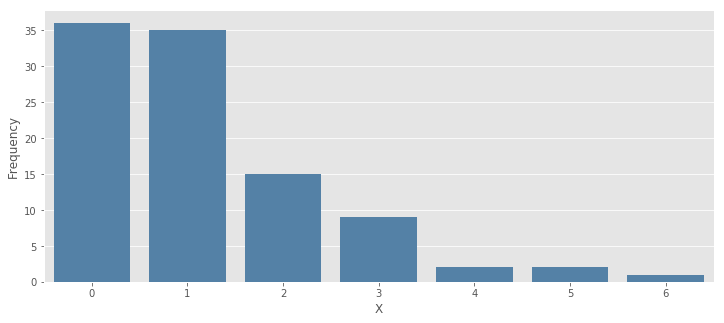

In [25]:
np.random.seed(1234)
Y = np.random.poisson(lam=1,size = 100)

# Plot
plt.figure(figsize=(12,5))
ax = sns.countplot(Y,color="steelblue")
ax = ax.set(xlabel='X', ylabel='Frequency')

Again note that as the value of $\lambda$ gets larger, the Poisson distribution begins to approximate the normal distribution, where $Y \sim Normal(\lambda,\lambda)$. 

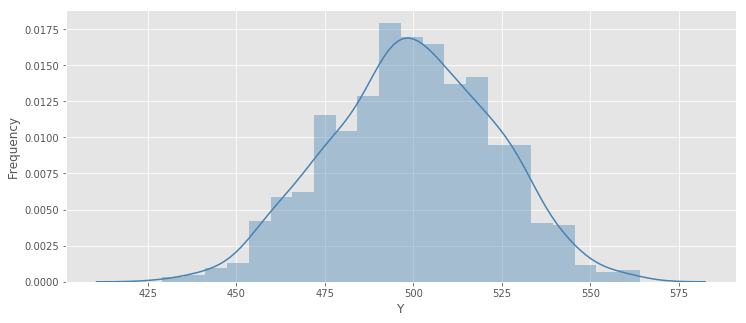

In [26]:
# Altering values of n and p
np.random.seed(1234)
Y = np.random.poisson(lam=500,size = 1000)

# Plot
plt.figure(figsize=(12,5))
ax = sns.distplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

# Continuous Distributions

### Probability Density Function (PDF)

<br>
<br>

$$ Pr( X \in [a,b]) = \int^b_a f(x) dx$$

<br>
<br>

where

$$ Pr( - \infty < X < \infty) = \int^{ - \infty}_\infty f(x) dx = 1$$

### Cumulative Density Function (CDF)

<br>
<br>

$$ Pr(X \le x) = F(x) = \int_{-\infty}^x f(t) dt $$

<br>
<br>

## Uniform Distribution

The uniform distribution is a continuous distribution that assigns equal probability to all possible values/events in the sample space (i.e. a given range). 

The PDF of the uniform distribution is 

$$ f(x) = \frac{1}{b-a} $$

where $x \in (a,b)$

<br>
<br>

We denote a variable that is distributed as a Uniform distribution as 

<br>
<br>

$$Y \sim Unif(a,b)$$

<br>
<br>

Where the parameters $a$ and $b$ correspond with the bounds of the range.

### Expectation (Mean)

$$ E[Y] = \frac{a+b}{2}$$

### Variance

$$ Var[Y] = \frac{(b-a)^2}{12}$$

### Simulation

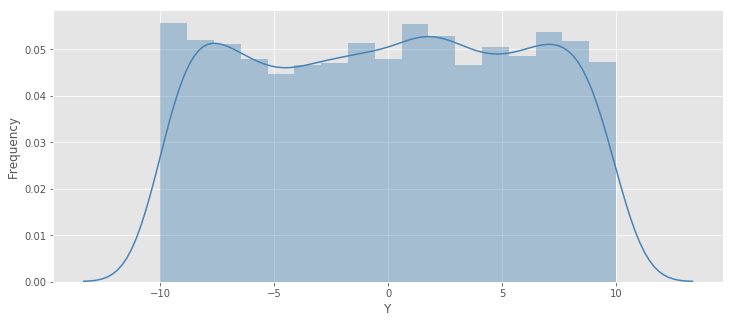

In [27]:
np.random.seed(1234)
Y = np.random.uniform(low=-10,high=10,size=5000)

# Plot
plt.figure(figsize=(12,5))
ax = sns.distplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

## Gaussian (Normal) Distribution

The Normal distribution is easily the most famous of the distributions. This distribution composes the theoretical underpinnings of the linear model. I'll remind you all of it's properties here given that you've had extensive exposure to it in your stats sequence. 

The PDF of the Normal distribution is 

$$ F(x; \mu, \sigma^2)  = \frac{1}{\sigma\sqrt{2 \pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}} $$

<br>
<br>

We denote a variable that is distributed as a Normal distribution as 

<br>
<br>

$$Y \sim N(\mu,\sigma^2)$$

<br>
<br>

Where the parameter $\mu$ corresponds with the expectation (mean) and $\sigma^2$ correspond with the variance.

### Expectation (Mean)

$$ E[Y] = \mu $$

### Variance

$$ Var[Y] = \sigma^2 $$

### Simulation

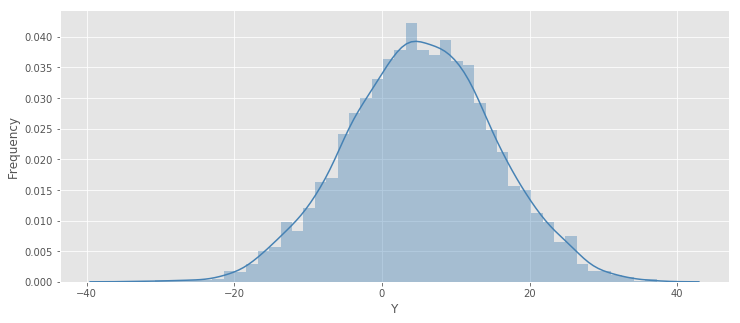

In [28]:
np.random.seed(1234)
Y = np.random.normal(loc=5,scale=10,size=5000)

# Plot
plt.figure(figsize=(12,5))
ax = sns.distplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

## Various Distributions: Special Cases of Each Other

There are many more distributions (both continuous and discrete) covered elsewhere. It's useful to keep in mind that they're all interconnected. Some distributions are special cases of other distributions and the like. 

![](http://ericdunford.com/ppol561/Lectures/week_02/Figures/probability-connections.png)

# Central Limit Theorem

Let's finish off by exploring the central limit theorem from a different angle using simulation. 

The central limit theorem states that the average of _any_ random variable follows a normal distribution, especially as the sample grows increasingly large. In short, no matter how odd the distribution you're sampling from, their means will stack normal. 

Let's simulate a distribution that is clearly not normal and see this in action. 

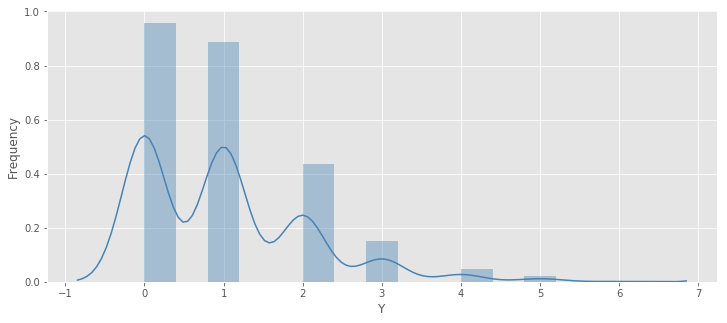

In [29]:
# First lets start with a poisson distribution
np.random.seed(1234)
Y = np.random.poisson(1,size=1000)

plt.figure(figsize=(12,5))
ax = sns.distplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

In [30]:
'''
The following code takes repeated simulated draws from a poisson distribution,
calculates the average, and then stores the values. 
'''
n_samples = 500
averages = [0]*n_samples
for i in range(n_samples):
    Y = np.random.poisson(1,size=1000)
    averages[i] = Y.mean()
    
print(averages[1:5],end=" ...")

[0.976, 1.013, 0.977, 1.015] ...

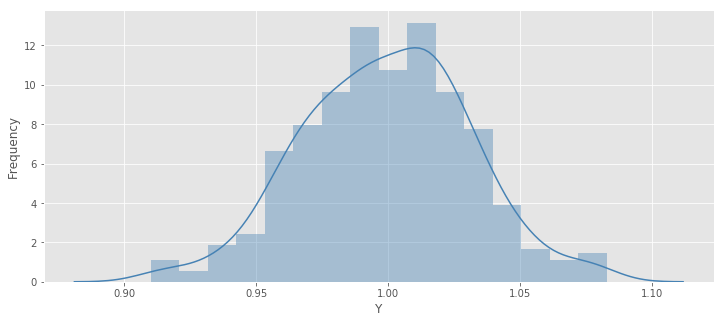

In [31]:
plt.figure(figsize=(12,5))
ax = sns.distplot(averages,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

Again!

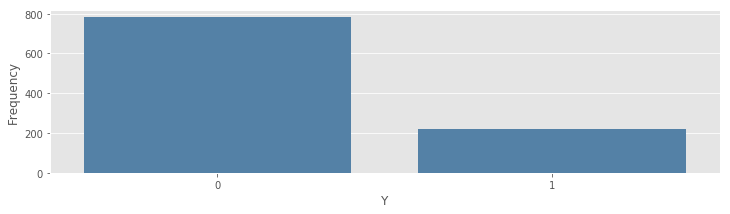

In [32]:
# First lets start with a Bernoullie distribution
np.random.seed(1234)
Y = np.random.binomial(1,p=.2,size=1000)

plt.figure(figsize=(12,3))
ax = sns.countplot(Y,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')

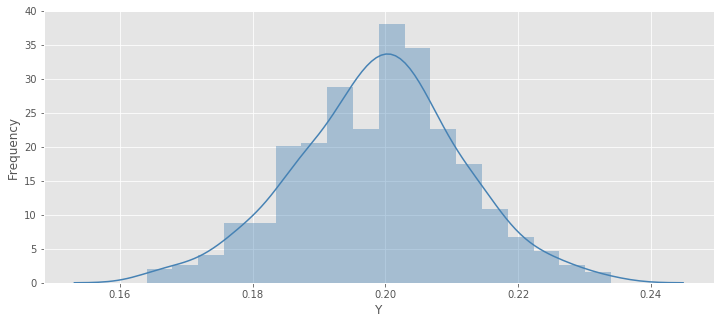

In [33]:
n_samples = 500
averages = [0]*n_samples
for i in range(n_samples):
    Y = np.random.binomial(1,p=.2,size=1000)
    averages[i] = Y.mean()
    
# Plot the averages
plt.figure(figsize=(12,5))
ax = sns.distplot(averages,color="steelblue")
ax = ax.set(xlabel='Y', ylabel='Frequency')